###### Author: Jean-Baptiste Gaudemet, Jules Deschamps

## Packages imports

In a first place we import all the necessary packages.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

## Global climate-related risk

The purpose of this first part is to calibrate physical and transition macro-correlation curves

In [3]:
from parameters import *

In [4]:
#transition efficiency coefficient (reduced)
alpha = 0.001

#transition effort reactivity coefficient
beta = 0.001

#climate change intensity of the economic activity (idiosyncratic)
gamma = 0

#hypothetical climate-free average growth rate of log GDP
R = 2

#independent transition coefficient
theta = 0.001

#idiosyncratic economic risk
e = 1

### 1) Horizon (in years)

In [5]:
#time horizon of the study
horizon = 50
#Number field

### 2) Physical risk

In [6]:
#idiosyncratic physical risk
p = 0.18
#Slider from 0 to 0.3

In [7]:
from ScenarioGenerator import ScenarioGenerator

scenario = ScenarioGenerator(horizon, alpha, beta, gamma, R, e, p, theta)
scenario.compute()

#logging of all macro-correlations evolutions

macros = scenario.macro_correlation.T

#plotting

plt.figure(figsize=(16,12))
plt.plot(range(1,horizon), macros[1:,:], label=["economic","physical","transition"])
plt.title("Physical risk against economical risk in the absence of transition effort over "+str(horizon)+" years",fontsize=20)
plt.ylabel("Normalized risk factor",fontsize=18)
plt.xlabel("year",fontsize=18)
plt.legend(fontsize=18,loc='lower right')
plt.show()

ModuleNotFoundError: No module named 'scipy'

No handles with labels found to put in legend.


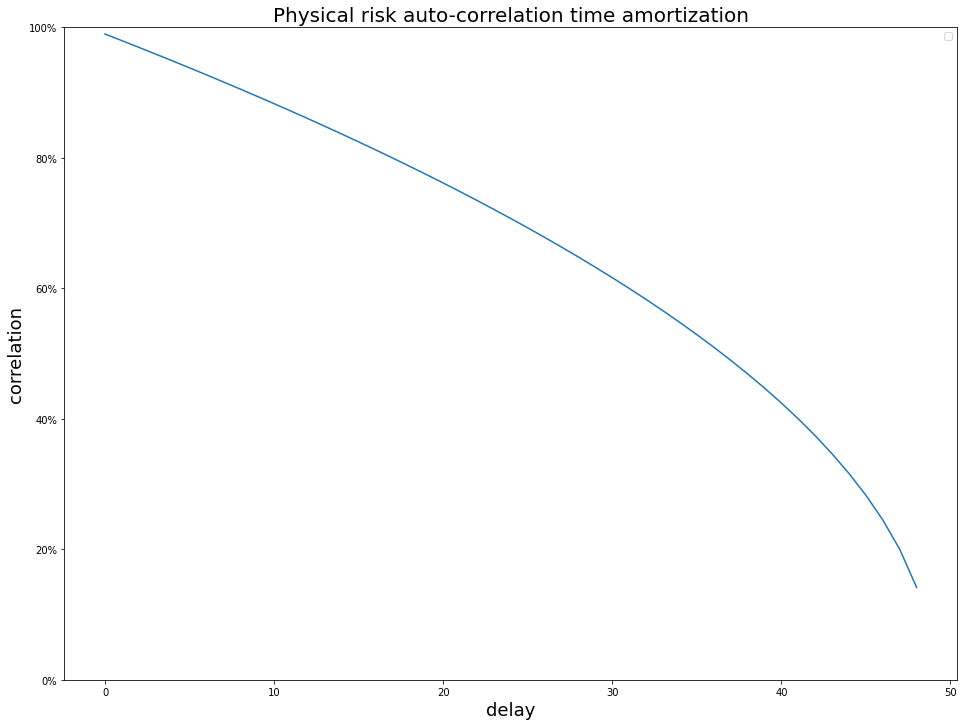

In [ ]:
from utils import correlation_from_covariance

# we compute the climate scenario until 2 * horizon to get auto- and cross- correlations as delayed as the horizon

scenario_extended = ScenarioGenerator(2 * horizon, alpha, beta, gamma, R, e, p, theta)
scenario_extended.compute()

# generation of the incremental matrix

A = np.array(
    [[0, 0, 0], [-scenario.gamma, 1, -scenario.alpha], [0, scenario.beta, 0]])

# initialization of autocorrelations

autocorrelation = np.zeros(
    (horizon, horizon-1, scenario.nb_rf, scenario.nb_rf))
autocorrelation_phy = np.zeros((horizon-1, horizon-1))
autocorrelation_tra = np.zeros((horizon-1, horizon-1))
autocorrelation_phy_tra = np.zeros((horizon-1, horizon))
autocorrelation_tra_phy = np.zeros((horizon-1, horizon))

# initialization of times and delays for which is drawn the graph

times = range(1, horizon)
taus = range(1, horizon)

# execution

for t in times:

    # logging of variance matrix at time t

    var_t = scenario_extended.var_at(t)
    corr = correlation_from_covariance(var_t)

    # logging of simultaneous cross-correlations, i.e. for delay tau=0

    autocorrelation_phy_tra[t-1, 0] = corr[2, 1]
    autocorrelation_tra_phy[t-1, 0] = corr[1, 2]

    # execution for each possible delay

    for tau in taus:

        # logging of variance matrix at time t+tau

        var_delay = scenario_extended.var_at(t+tau)

        # logging of inverse [standard deviations (macro-correlations)] at times t and t+tau

        at_time = np.reshape(1/np.sqrt(np.diag(var_t)), (3, 1))
        at_delay = np.reshape(1/np.sqrt(np.diag(var_delay)), (3, 1))

        # following the formula from the paper

        invsd = (at_delay@at_time.T)
        autocorrelation = invsd*(np.linalg.matrix_power(A, tau)@var_t)

        # logging all auto- and cross-correlations

        autocorrelation_phy[t-1, tau-1] = autocorrelation[1, 1]
        autocorrelation_tra[t-1, tau-1] = autocorrelation[2, 2]
        autocorrelation_phy_tra[t-1, tau] = autocorrelation[2, 1]
        autocorrelation_tra_phy[t-1, tau] = autocorrelation[1, 2]
        
        
#plotting auto-correlation
import matplotlib.ticker as mtick


plt.figure(figsize=(16,12))
plt.plot(np.flipud(autocorrelation_phy).diagonal())
#plt.plot(autocorrelation_phy[0,:])



plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.ylim([0, 1])

plt.xlabel("delay",fontsize=18)
plt.ylabel("correlation",fontsize=18)
plt.title("Physical risk auto-correlation time amortization",fontsize=20)

plt.legend()
plt.show()

### 3) Transition effort efficiency: Carbon emmission mitigation rate per point of GDP
#### Note in first approximation the transition effort efficiency of an economic recession is 1

In [ ]:
#transition efficiency coefficient (reduced)
Efficiency=7
#Slider from 1 to 20

alpha=Efficiency/100

### 4) Transition reactivity: Transition effort consented in response to physical damage cost

In [ ]:
#transition effort reactivity coefficient
Reactivity=0.5
#Slider from 0.001 to 2

beta = Reactivity

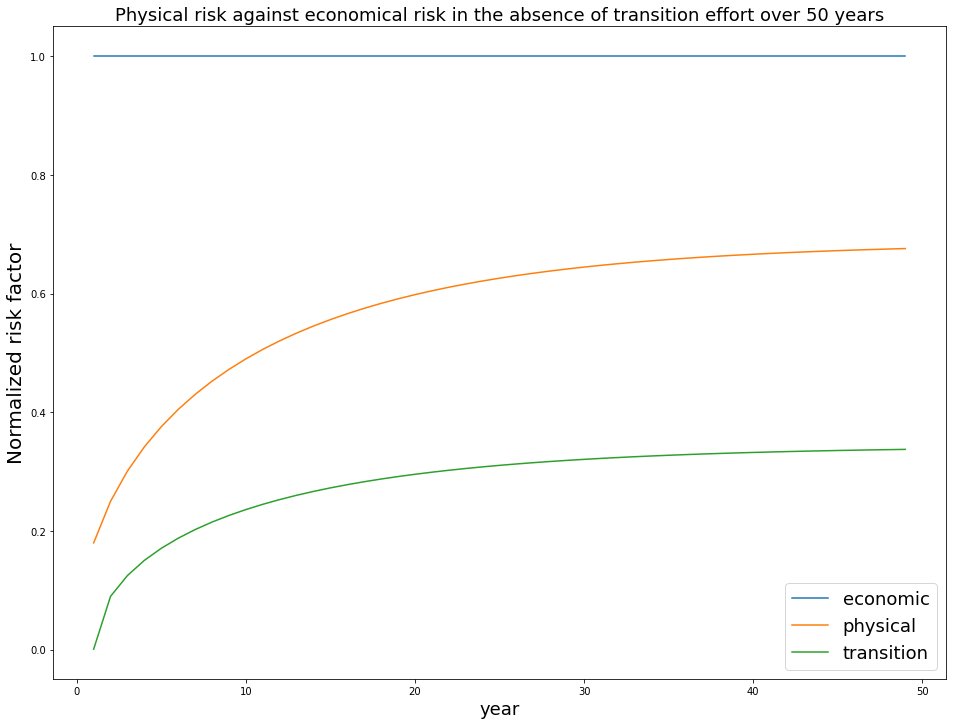

In [ ]:
scenario = ScenarioGenerator(horizon, alpha, beta, gamma, R, e, p, theta)
scenario.compute()

#logging of all macro-correlations evolutions

macros = scenario.macro_correlation.T

#plotting

plt.figure(figsize=(16,12))
plt.plot(range(1,horizon), macros[1:,:], label=["economic","physical","transition"])
plt.title("Physical risk against economical risk in the absence of transition effort over "+str(horizon)+" years",fontsize=18)
plt.ylabel("Normalized risk factor",fontsize=20)
plt.xlabel("year",fontsize=18)
plt.legend(fontsize=18,loc='lower right')
plt.show()

No handles with labels found to put in legend.


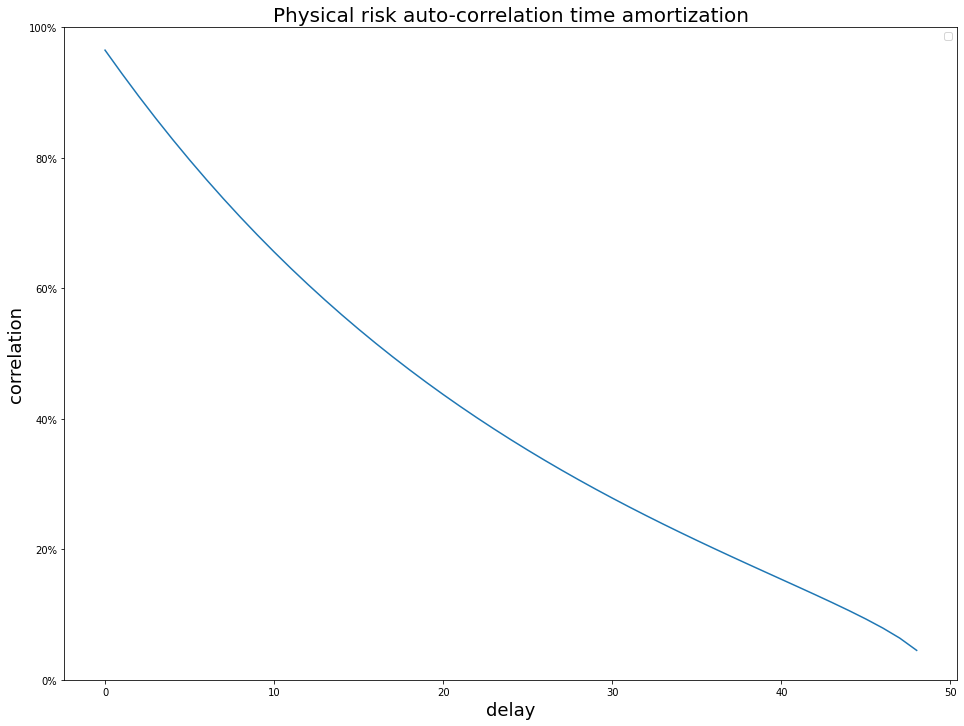

In [ ]:
from utils import correlation_from_covariance

# we compute the climate scenario until 2 * horizon to get auto- and cross- correlations as delayed as the horizon

scenario_extended = ScenarioGenerator(2 * horizon, alpha, beta, gamma, R, e, p, theta)
scenario_extended.compute()

# generation of the incremental matrix

A = np.array(
    [[0, 0, 0], [-scenario.gamma, 1, -scenario.alpha], [0, scenario.beta, 0]])

# initialization of autocorrelations

autocorrelation = np.zeros(
    (horizon, horizon-1, scenario.nb_rf, scenario.nb_rf))
autocorrelation_phy = np.zeros((horizon-1, horizon-1))
autocorrelation_tra = np.zeros((horizon-1, horizon-1))
autocorrelation_phy_tra = np.zeros((horizon-1, horizon))
autocorrelation_tra_phy = np.zeros((horizon-1, horizon))

# initialization of times and delays for which is drawn the graph

times = range(1, horizon)
taus = range(1, horizon)

# execution

for t in times:

    # logging of variance matrix at time t

    var_t = scenario_extended.var_at(t)
    corr = correlation_from_covariance(var_t)

    # logging of simultaneous cross-correlations, i.e. for delay tau=0

    autocorrelation_phy_tra[t-1, 0] = corr[2, 1]
    autocorrelation_tra_phy[t-1, 0] = corr[1, 2]

    # execution for each possible delay

    for tau in taus:

        # logging of variance matrix at time t+tau

        var_delay = scenario_extended.var_at(t+tau)

        # logging of inverse [standard deviations (macro-correlations)] at times t and t+tau

        at_time = np.reshape(1/np.sqrt(np.diag(var_t)), (3, 1))
        at_delay = np.reshape(1/np.sqrt(np.diag(var_delay)), (3, 1))

        # following the formula from the paper

        invsd = (at_delay@at_time.T)
        autocorrelation = invsd*(np.linalg.matrix_power(A, tau)@var_t)

        # logging all auto- and cross-correlations

        autocorrelation_phy[t-1, tau-1] = autocorrelation[1, 1]
        autocorrelation_tra[t-1, tau-1] = autocorrelation[2, 2]
        autocorrelation_phy_tra[t-1, tau] = autocorrelation[2, 1]
        autocorrelation_tra_phy[t-1, tau] = autocorrelation[1, 2]
        
        
#plotting auto-correlation
import matplotlib.ticker as mtick


plt.figure(figsize=(16,12))
plt.plot(np.flipud(autocorrelation_phy).diagonal())
#plt.plot(autocorrelation_phy[0,:])



plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.ylim([0, 1])

plt.xlabel("delay",fontsize=18)
plt.ylabel("correlation",fontsize=18)
plt.title("Physical risk auto-correlation time amortization",fontsize=20)

plt.legend()
plt.show()

## Credit rating

Credit Rating define the probability of default within the year. Note it therefore includes the short term impact of climate risk. 

The credit rating transition matrix model the probability to change rating year on year. It is calculated from an historical basis and is publically available. 

In [ ]:
#Transition raing matrix

from Ratings import TEST_8_RATINGS

ratings_table = pd.DataFrame(TEST_8_RATINGS.reg_mat())
ratings_table.index, ratings_table.columns = TEST_8_RATINGS.list(), TEST_8_RATINGS.list()
ratings_table

,AAA,AA,A,BBB,BB,B+,B,D
AAA,0.9081,0.0833,0.0068,0.0006,0.0012,0.0000,0.0000,0.0000
AA,0.0070,0.9065,0.0779,0.0064,0.0006,0.0014,0.0002,0.0000
A,0.0009,0.0227,0.9105,0.0552,0.0074,0.0026,0.0001,0.0006
BBB,0.0002,0.0033,0.0595,0.8693,0.0530,0.0117,0.0012,0.0018
BB,0.0003,0.0014,0.0067,0.0773,0.8053,0.0884,0.0100,0.0106
B+,0.0000,0.0011,0.0024,0.0043,0.0648,0.8346,0.0407,0.0520
B,0.0022,0.0000,0.0022,0.0130,0.0238,0.1124,0.6486,0.1979
D,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


## Portfolio

In [ ]:
from Portfolio import Portfolio, load_from_file, show
nb_ratings = 8
nb_groups = 3
nb_rf=3

from Loan import Loan
from Portfolio import Portfolio
import uuid

world_portfolio = Portfolio("world_portfolio")

#from Portfolio import dump_to_file
portfolio = world_portfolio
#dump_to_file(world_portfolio,"demo")

micro_correlation = np.ones((nb_groups, nb_ratings, nb_rf))

### 5) Portfolio average duration

In [ ]:
#duration
duration=10
#Numerical field

### 6) Target Net Zero

In [ ]:
#Green Portfolio

#Target rating
Green_Rating='BBB' 

#Should be drop down within this list
print (TEST_8_RATINGS.list())

#Average physical exposure (in comparaison with the global economy)
micro_correlation[0,:,1]=0.5
#Slider from 0 to 4

#Average transition exposure (in comparaison with the global economy)
micro_correlation[0,:,2]=0
#Slider from 0 to 4

#Transition target date
transition_target_date=2050

NameError: name 'TEST_8_RATINGS' is not defined

### 7) Initial Portfolio

In [ ]:
#Portfolio A

#Target rating
A_Rating='BBB' 

#Should be drop down within this list
print (TEST_8_RATINGS.list())

#Average physical exposure (in comparaison with the global economy)
micro_correlation[1,:,1]=1
#Slider from 0 to 4

#Average transition exposure (in comparaison with the global economy)
micro_correlation[1,:,2]=2
#Slider from 0 to 4


['AAA', 'AA', 'A', 'BBB', 'BB', 'B+', 'B', 'D']


### Transition Portfolio

In [ ]:
#Portfolio B

#Target rating
B_Rating=A_Rating

#Average physical exposure (in comparaison with the global economy)
micro_correlation[2,:,1]=micro_correlation[1,:,1]

#Average transition exposure (in comparaison with the global economy)
micro_correlation[2,:,2]=micro_correlation[1,:,2]

In [ ]:


world_portfolio.add_loan(Loan(uuid.uuid4(), 'gov', "Green", 'gov', 100, 1000000000, 0, Green_Rating))
world_portfolio.add_loan(Loan(uuid.uuid4(), 'gov', "Portfolio A", 'gov', 100, 1000000000, 0, A_Rating))
world_portfolio.add_loan(Loan(uuid.uuid4(), 'gov', "Portfolio B", 'gov', 100, 1000000000, 0, B_Rating))




size=world_portfolio.EAD(1,TEST_8_RATINGS).sum()
target=world_portfolio.EAD(1,TEST_8_RATINGS).sum(axis=0)[0]/size

portfolio_dict = show(portfolio)
all_loans = np.vstack(portfolio_dict.values())
all_principals = all_loans[:,0]
total_principal = sum(np.array(all_principals, dtype=np.int32))

/var/folders/9r/n9d0f4t12xx3rcgzxxzws5ph0000gp/T/ipykernel_80158/475642835.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  all_loans = np.vstack(portfolio_dict.values())


In [ ]:
#Transition from Brown to Green
#transition_horizon=28
    
#sensitivity_objective =0.01

## Portfolio credit loss distribution

In [ ]:
from LargeCERMEngine import LargeCERMEngine

In [ ]:
# number of iterations for Monte-Carlo simulation

N = 5000

# risk values

risk1 = .05
risk2 = .01

print(target)

[0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#computation of all losses through LCERM

engine = LargeCERMEngine(portfolio, TEST_8_RATINGS,scenario,duration,target,micro_correlation,transition_target_date)
engine.compute(N)

#definition of risk indices matching risk1 and risk2

ind1 = int(np.floor(N*(1-risk1)))
ind2 = int(np.floor(N*(1-risk2)))

#logging of all losses

losses = engine.loss_results

#logging of final physical and transition cumulative risks (the - sign is simply so that loss distribution in the physical/transition plane is well-oriented)

cumulative_growth_factors = -engine.cumulative_growth_factors[1:, :]

#logging of final losses for plane distribution

scenario_losses = losses.sum(axis=(1,2))

#sorting of all losses, to assess the losses at risk1 and risk2

sorted_losses = np.sort(losses, axis=0)

#logging of non-cumulative expected loss, unexpected loss at risk risk1, unexpected loss at risk risk2 at each time

el, ul1, ul2 = sorted_losses.sum(axis=(0,1))/N, (sorted_losses.sum(axis=1))[ind1], (sorted_losses.sum(axis=1))[ind2]
el_g, ul1_g, ul2_g = sorted_losses.sum(axis=(0))/N, sorted_losses[ind1], sorted_losses[ind2]

#logging of all final losses or all iterations

#draws = np.sort(losses.sum(axis=(1,2)))
#draws = np.sort(losses[:,0][:,-1])


#computation of cumulative expected loss, unexpected loss at risk risk1, unexpected loss at risk risk2 at each time

#for t in range(1,horizon):
#   el[t] += el[t-1]
#  ul1[t] += ul1[t-1]
# ul2[t] += ul2[t-1]

#logging of final cumulative expected loss, unexpected loss at risk risk1, unexpected loss at risk risk2


#expected_loss = el[-1]
#unexpected_loss1 = ul1[-1]
#unexpected_loss2 = ul2[-1]

el_rate=  np.zeros(horizon)
ul1_rate= np.zeros(horizon)
ul2_rate= np.zeros(horizon)

el_rate[0]=1+el[0]/size
ul1_rate[0]=1+ul1[0]/size
ul2_rate[0]=1+ul2[0]/size

for t in range(1,horizon):
    el_rate[t]=el_rate[t-1]*(1+(el[t]-el[t-1])/(size-el[t-1]))
    ul1_rate[t]=ul1_rate[t-1]*(1+(ul1[t]-ul1[t-1])/(size-ul1[t-1]))
    ul2_rate[t]=ul2_rate[t-1]*(1+(ul2[t]-ul2[t-1])/(size-ul2[t-1]))

    
for t in range(0,horizon):
    el_rate[t]=el_rate[t]**(1/(t+1))-1
    ul1_rate[t]=ul1_rate[t]**(1/(t+1))-1
    ul2_rate[t]=ul2_rate[t]**(1/(t+1))-1


Initializing CERM for 3 loans in 3 groups, 8 ratings with horizon 50
27


/Users/u724552/Develop/April28CERM/amaltheafs-cerm_advanced-8589c3df9458/main/MatrixAndThresholdGenerator.py:246: RuntimeWarning: invalid value encountered in true_divide
  self.c_factor = self.reg_factor_loadings * a_tilde / self.init_tilde_factor_loadings
/Users/u724552/Develop/April28CERM/amaltheafs-cerm_advanced-8589c3df9458/main/ScenarioGenerator.py:262: RuntimeWarning: overflow encountered in exp
  self.var_gdp = (np.exp(self.s_squared)-1)*np.exp(2*self.mu+self.s_squared)
/Users/u724552/Develop/April28CERM/amaltheafs-cerm_advanced-8589c3df9458/main/ScenarioGenerator.py:262: RuntimeWarning: overflow encountered in multiply
  self.var_gdp = (np.exp(self.s_squared)-1)*np.exp(2*self.mu+self.s_squared)
/Users/u724552/Develop/April28CERM/amaltheafs-cerm_advanced-8589c3df9458/main/MatrixAndThresholdGenerator.py:300: RuntimeWarning: divide by zero encountered in true_divide
  self.conditional_thresholds = (self.thresholds - srisks_resized)/self.ratio2_resized


### Target Net Zero

No handles with labels found to put in legend.


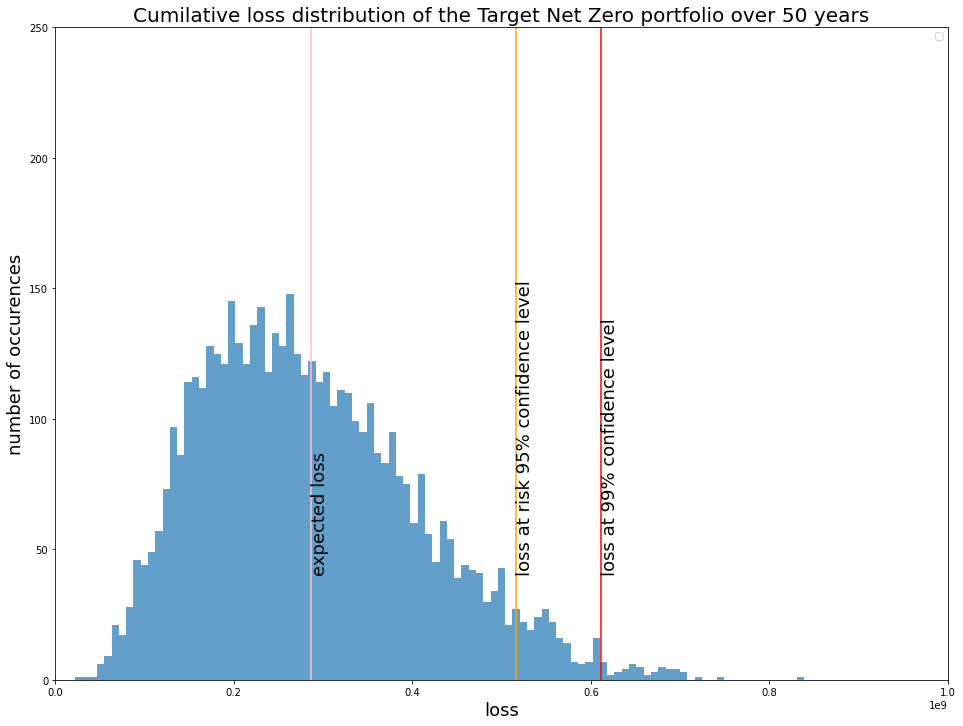

In [ ]:
#plotting of final loss distribution, along with expected loss and unexpected losses at risks risk1 and risk2

draws = np.sort(sorted_losses[:,0,-1])
expected_loss= draws.sum()/N
unexpected_loss1=draws[ind1]
unexpected_loss2 = draws[ind2]

plt.figure(figsize=(16, 12))
#plt.hist(draws, bins=max(200, N//100), alpha=.7)
plt.hist(draws, bins=int(N/50),alpha=.7)

plt.axvline(x = expected_loss, color='pink')
plt.text(expected_loss+20, N/120,"expected loss",rotation=90,fontsize=18)
plt.axvline(x = unexpected_loss1, color='orange')
plt.text(unexpected_loss1+20, N/120,"loss at risk "+str(100-int(100*risk1))+"% confidence level",rotation=90,fontsize=18)
plt.axvline(x = unexpected_loss2, color='red')
plt.text(unexpected_loss2+20, N/120,"loss at "+str(100-int(100*risk2))+"% confidence level",rotation=90,fontsize=18)

plt.xlabel("loss",fontsize=18)
plt.ylabel("number of occurences",fontsize=18)
plt.title("Cumilative loss distribution of the Target Net Zero portfolio over " +str(horizon)+ " years",fontsize=20)
plt.xlim([0, 1000000000])
plt.ylim([0, 250])

plt.legend()
plt.show()

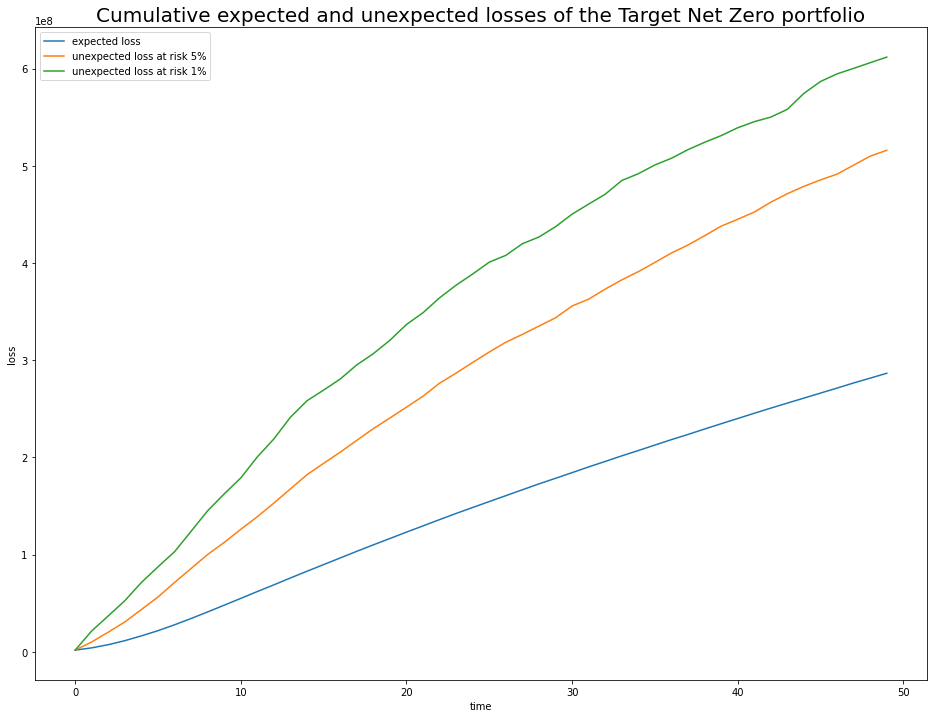

In [ ]:
#plotting of evolution of expected loss and unexpected losses at risks risk1 and risk2

plt.figure(figsize=(16,12))
plt.plot(el_g[0], label="expected loss")
plt.plot(ul1_g[0], label="unexpected loss at risk "+str(int(100*risk1))+"%")
plt.plot(ul2_g[0], label="unexpected loss at risk "+str(int(100*risk2))+"%")

plt.xlabel("time")
plt.ylabel("loss")
plt.title("Cumulative expected and unexpected losses of the Target Net Zero portfolio",fontsize=20)

plt.legend()
plt.show()

### Initial Portfolio losses

No handles with labels found to put in legend.


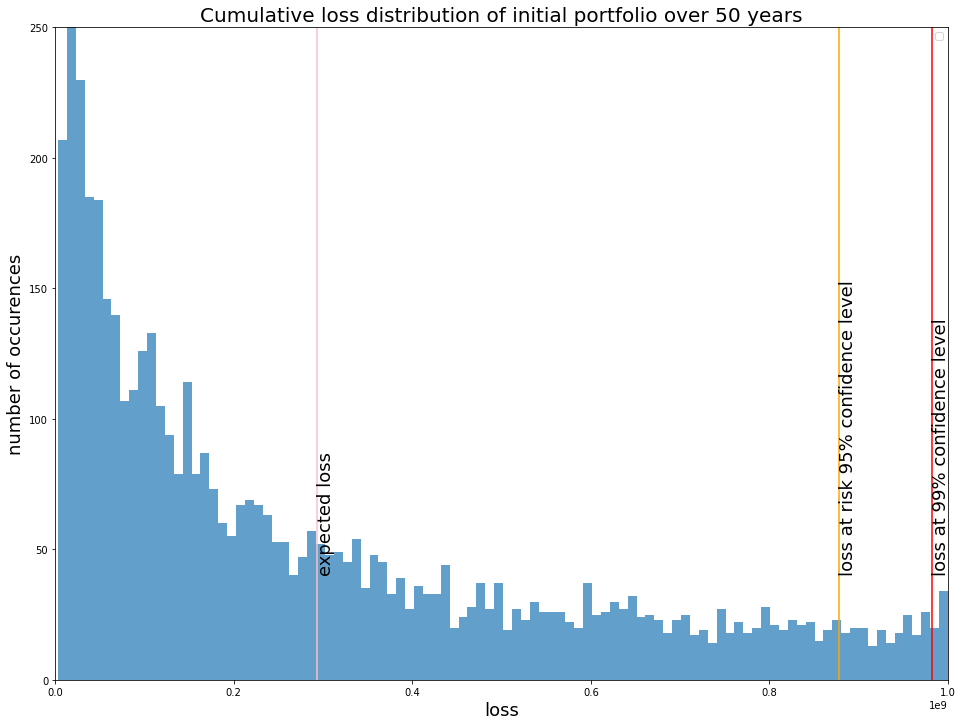

In [ ]:
#plotting of final loss distribution, along with expected loss and unexpected losses at risks risk1 and risk2

draws = np.sort(sorted_losses[:,1,-1])
expected_loss= draws.sum()/N
unexpected_loss1=draws[ind1]
unexpected_loss2 = draws[ind2]

plt.figure(figsize=(16, 12))
#plt.hist(draws, bins=max(200, N//100), alpha=.7)
plt.hist(draws, bins=int(N/50),alpha=.7)

plt.axvline(x = expected_loss, color='pink')
plt.text(expected_loss+20, N/120,"expected loss",rotation=90,fontsize=18)
plt.axvline(x = unexpected_loss1, color='orange')
plt.text(unexpected_loss1+20, N/120,"loss at risk "+str(100-int(100*risk1))+"% confidence level",rotation=90,fontsize=18)
plt.axvline(x = unexpected_loss2, color='red')
plt.text(unexpected_loss2+20, N/120,"loss at "+str(100-int(100*risk2))+"% confidence level",rotation=90,fontsize=18)

plt.xlabel("loss",fontsize=18)
plt.ylabel("number of occurences",fontsize=18)
plt.title("Cumulative loss distribution of initial portfolio over " +str(horizon)+ " years",fontsize=20)
plt.xlim([0, 1000000000])
plt.ylim([0, 250])

plt.legend()
plt.show()

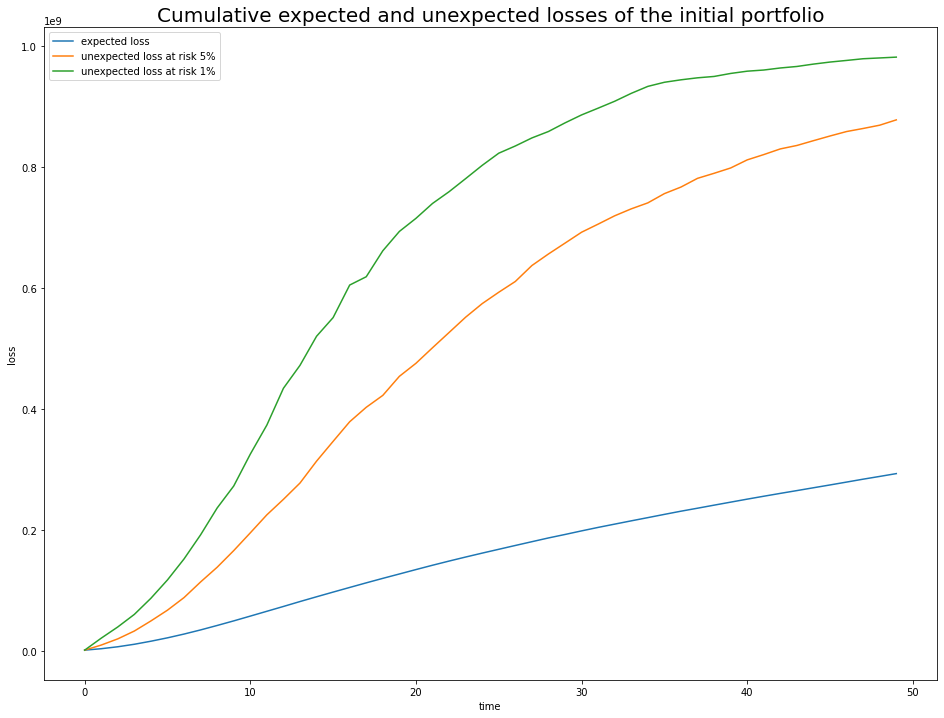

In [ ]:
#plotting of evolution of expected loss and unexpected losses at risks risk1 and risk2

plt.figure(figsize=(16,12))
plt.plot(el_g[1], label="expected loss")
plt.plot(ul1_g[1], label="unexpected loss at risk "+str(int(100*risk1))+"%")
plt.plot(ul2_g[1], label="unexpected loss at risk "+str(int(100*risk2))+"%")

plt.xlabel("time")
plt.ylabel("loss")
plt.title("Cumulative expected and unexpected losses of the initial portfolio",fontsize=20)

plt.legend()
plt.show()

### Transition Portfolio losses

No handles with labels found to put in legend.


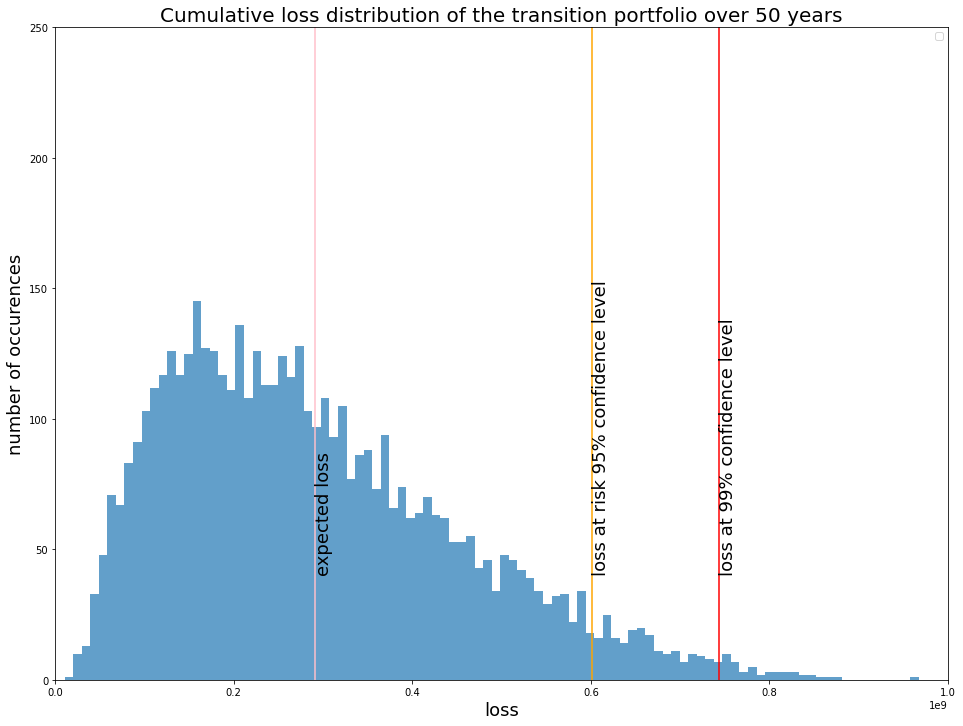

In [ ]:
#plotting of final loss distribution, along with expected loss and unexpected losses at risks risk1 and risk2

draws = np.sort(sorted_losses[:,2,-1])
expected_loss= draws.sum()/N
unexpected_loss1=draws[ind1]
unexpected_loss2 = draws[ind2]

plt.figure(figsize=(16, 12))
#plt.hist(draws, bins=max(200, N//100), alpha=.7)
plt.hist(draws, bins=int(N/50),alpha=.7)

plt.axvline(x = expected_loss, color='pink')
plt.text(expected_loss+20, N/120,"expected loss",rotation=90,fontsize=18)
plt.axvline(x = unexpected_loss1, color='orange')
plt.text(unexpected_loss1+20, N/120,"loss at risk "+str(100-int(100*risk1))+"% confidence level",rotation=90,fontsize=18)
plt.axvline(x = unexpected_loss2, color='red')
plt.text(unexpected_loss2+20, N/120,"loss at "+str(100-int(100*risk2))+"% confidence level",rotation=90,fontsize=18)

plt.xlabel("loss",fontsize=18)
plt.ylabel("number of occurences",fontsize=18)
plt.title("Cumulative loss distribution of the transition portfolio over " +str(horizon)+ " years",fontsize=20)
plt.xlim([0, 1000000000])
plt.ylim([0, 250])

plt.legend()
plt.show()

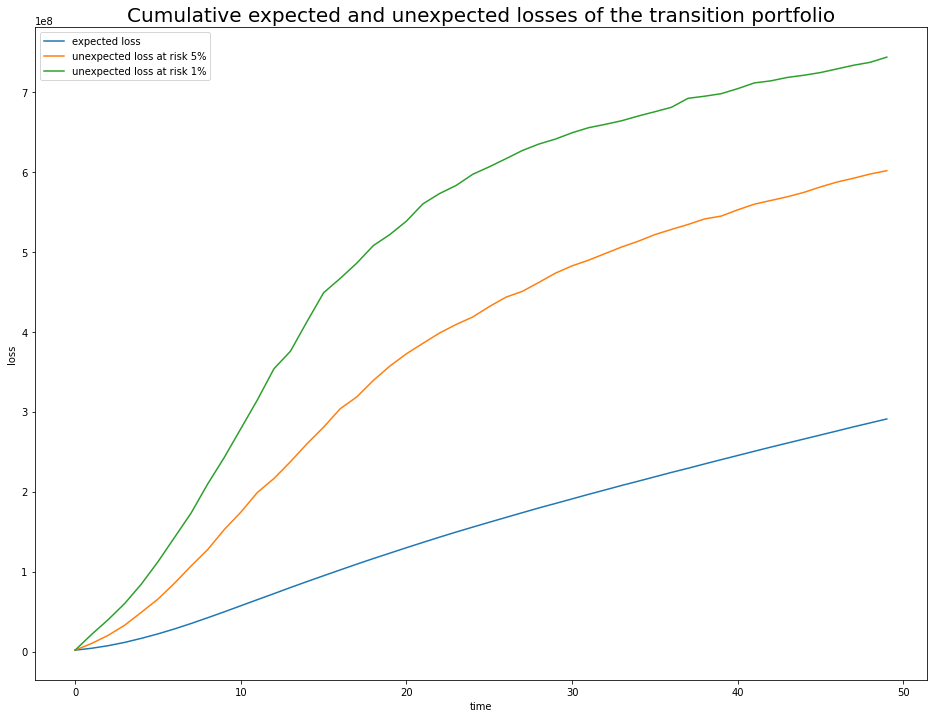

In [ ]:
#plotting of evolution of expected loss and unexpected losses at risks risk1 and risk2

plt.figure(figsize=(16,12))
plt.plot(el_g[2], label="expected loss")
plt.plot(ul1_g[2], label="unexpected loss at risk "+str(int(100*risk1))+"%")
plt.plot(ul2_g[2], label="unexpected loss at risk "+str(int(100*risk2))+"%")

plt.xlabel("time")
plt.ylabel("loss")
plt.title("Cumulative expected and unexpected losses of the transition portfolio" ,fontsize=20)

plt.legend()
plt.show()

## Portfolio unexpected loss

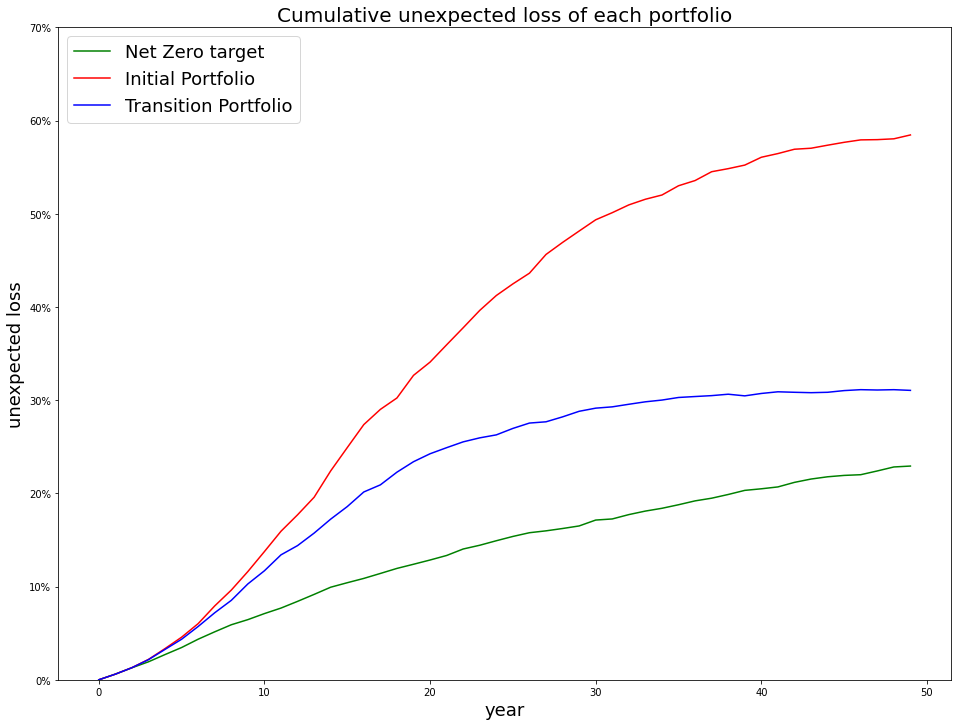

In [ ]:
#plotting of evolution of unexpected loss
import matplotlib.ticker as mtick


plt.figure(figsize=(16,12))
plt.plot((ul1_g[0]-el_g[0])/1000000000, label="Net Zero target",color ='green')
plt.plot((ul1_g[1]-el_g[1])/1000000000, label="Initial Portfolio",color='red')
plt.plot((ul1_g[2]-el_g[2])/1000000000, label="Transition Portfolio",color='blue')
#plt.plot((ul1_AB-el_AB)/2000000000, label="Portfolio A+B",color='purple')
#plt.plot((ul1_g[3]-el_g[3])/1000000000, label="Brown", color='brown')
#plt.plot((ul1_g[4]-el_g[4])/1000000000, label="Net zero 2050",color='blue')

plt.legend(fontsize=18,loc='upper left')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.ylim([0, 0.7])



plt.xlabel("year",fontsize=18)
plt.ylabel("unexpected loss",fontsize=18)
plt.title("Cumulative unexpected loss of each portfolio",fontsize=20)


plt.show()